In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
os.chdir('U:\\ProjectDataset')

In [3]:
dt=pd.read_excel('PCA_LUAD_L.xlsx')

In [4]:
tar=pd.read_excel('survival_LUAD.xlsx')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
dt=dt.set_index(dt.columns[0])

In [7]:
Y=tar

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(dt,Y,test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(413, 16) (413, 1)
(104, 16) (104, 1)


In [100]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha=0.001,normalize=True)
ridgeReg.fit(X_train,Y_train)
predictions=ridgeReg.predict(X_test)


In [101]:
ridgeReg.score(X_test,Y_test)

0.9116731291814527

In [102]:
ridgeReg.score(X_train,Y_train)

0.7991087852899259

In [103]:
R_coef=ridgeReg.coef_

In [104]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,predictions))

120.40181278665906


In [60]:
import numpy as np
predictors=dt.columns
R_coef=np.array(R_coef)
R_coef=R_coef.flatten()

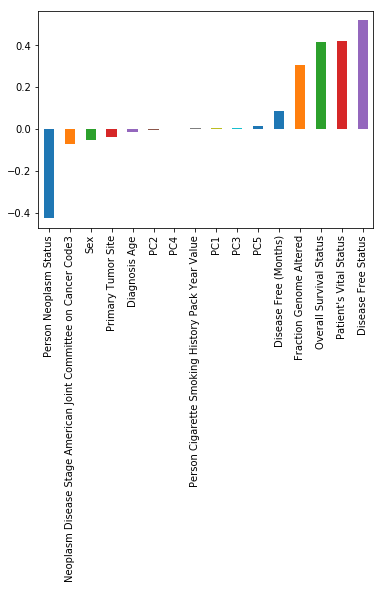

In [61]:
from pandas import Series
predictors=X_train.columns
coef=Series(R_coef,predictors).sort_values()
coef.plot(kind='bar')